In [ ]:
import numpy as np
import pandas as pd
import wordcloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [ ]:
sms = pd.read_csv('/content/spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms.shape

(5572, 3)

In [ ]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [ ]:
sms.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
##filter the ham messages

df=pd.DataFrame(sms)
hamfilter=df.loc[df['label']=='ham']
print(hamfilter)


     label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
6      ham  Even my brother is not like to speak with me. ...      77
...    ...                                                ...     ...
5565   ham                                       Huh y lei...      12
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[4825 rows x 3 columns]


In [ ]:
##filter the spam messages

df=pd.DataFrame(sms)
Spamfilter=df.loc[df['label']=='spam']
print(Spamfilter)


     label                                            message  length
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
5     spam  FreeMsg Hey there darling it's been 3 week's n...     148
8     spam  WINNER!! As a valued network customer you have...     158
9     spam  Had your mobile 11 months or more? U R entitle...     154
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136
...    ...                                                ...     ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     160
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...     160
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147
5567  spam  This is the 2nd time we have tried 2 contact u...     161

[747 rows x 3 columns]


<ipython-input-16-88364cd06415>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

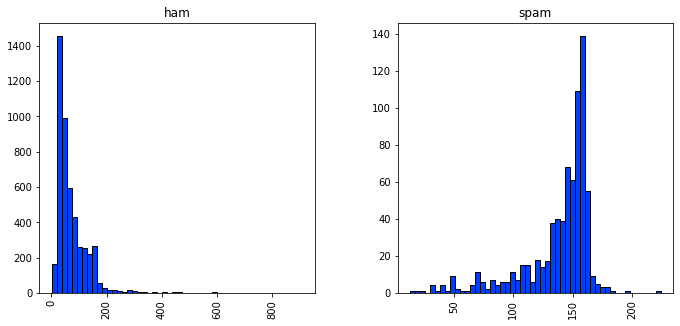

In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

Text processing and vectorizing our meddages

In [ ]:
text_feat = sms['message'].copy()

In [ ]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text_feat = text_feat.apply(text_process)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
features = vectorizer.fit_transform(text_feat)

Classifiers and predictions


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc}

In [ ]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [ ]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [ ]:
pred_scores

[('SVC', [0.9784688995215312]),
 ('KN', [0.9246411483253588]),
 ('NB', [0.9844497607655502]),
 ('DT', [0.958732057416268]),
 ('LR', [0.9431818181818182])]

In [ ]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [ ]:
text_feat = text_feat.apply(stemmer)

In [ ]:
features = vectorizer.fit_transform(text_feat)


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)


In [ ]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [ ]:
pred_scores

[('SVC', [0.9784688995215312]),
 ('KN', [0.9282296650717703]),
 ('NB', [0.9850478468899522]),
 ('DT', [0.9599282296650717]),
 ('LR', [0.9467703349282297])]